In [1]:
# imports
import pandas as pd


In [2]:
# reading the dataset
df = pd.read_csv('Data/AB_US_2020.csv')
# first five rows of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [3]:
# shape of the dataset(rows,columns)
df.shape

(226030, 17)

In [4]:
# To find the data types of all the columns
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
city                               object
dtype: object

In [5]:
# To find null or missing values
df.isnull().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

In [6]:
# occurrences of different room_type in a column
df['room_type'].value_counts()

Entire home/apt    154173
Private room        65887
Shared room          4029
Hotel room           1941
Name: room_type, dtype: int64

In [7]:
# occurrences of different cities in a column
df['city'].value_counts()

New York City        45756
Los Angeles          31536
Hawaii               22434
San Diego            12404
Broward County       10858
Austin               10436
Clark County          8408
Washington D.C.       7350
San Clara Country     7091
San Francisco         7053
Seattle               6575
Twin Cities MSA       6470
New Orleans           6408
Chicago               6397
Nashville             6139
Portland              4281
Denver                4200
Rhode Island          3884
Boston                3339
Oakland               3204
San Mateo County      2855
Jersey City           2488
Asheville             2074
Santa Cruz County     1571
Columbus              1409
Cambridge             1029
Salem                  202
Pacific Grove          179
Name: city, dtype: int64

In [8]:
# occurrences of different neighbourhood
df['neighbourhood'].value_counts()

Unincorporated Areas    8020
Hollywood               4384
Primary Urban Center    4179
Hennepin                3935
Kihei-Makena            3894
                        ... 
East Side                  1
North Kennedy Tract        1
Village De Lest            1
Lake Hughes                1
Woodrow                    1
Name: neighbourhood, Length: 1450, dtype: int64

In [9]:
# first 5 values of neighbourhood column
df['neighbourhood'].head()

0    28804
1    28801
2    28801
3    28806
4    28801
Name: neighbourhood, dtype: object

In [10]:
# last 5 values of neighbourhood column
df['neighbourhood'].tail()

226025    Downtown, Chinatown, Penn Quarters, Mount Vern...
226026                        Brookland, Brentwood, Langdon
226027                                   Shaw, Logan Circle
226028       Kalorama Heights, Adams Morgan, Lanier Heights
226029    Edgewood, Bloomingdale, Truxton Circle, Eckington
Name: neighbourhood, dtype: object

In [11]:
# occurrences of different neighbourhood_group
df['neighbourhood_group'].value_counts()

Manhattan               20236
Brooklyn                18263
City of Los Angeles     17544
Other Cities            11463
Maui                     7897
Honolulu                 6313
Queens                   5746
Hawaii                   4977
Kauai                    3247
Unincorporated Areas     2529
Newport                  1412
Other neighborhoods      1253
Washington               1201
Bronx                    1185
Providence               1056
Downtown                 1043
Capitol Hill              682
Central Area              572
Queen Anne                459
West Seattle              378
Ballard                   369
Rainier Valley            357
Staten Island             326
Cascade                   268
Beacon Hill               252
University District       238
Delridge                  201
Northgate                 150
Magnolia                  132
Lake City                 118
Kent                      108
Bristol                   107
Seward Park                69
Interbay  

In [12]:
pd.options.display.max_rows = 20
df["minimum_nights"].value_counts()

1      60427
2      54748
30     33532
3      30931
4       9513
       ...  
49         1
345        1
229        1
102        1
456        1
Name: minimum_nights, Length: 169, dtype: int64

In [13]:
# dropped the irrelevant columns and created new dataframe
new_df = df.drop(['host_name','host_id','neighbourhood_group','neighbourhood','last_review'], axis=1)

In [14]:
# first 5 rows of new dataset
new_df.head()

,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville
1,80905,French Chic Loft,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,Asheville
4,160594,Historic Grove Park,35.61442,-82.54127,Private room,125,30,58,0.52,1,0,Asheville


In [15]:
# replacing NaN values for the reviews_per_month column
new_df['reviews_per_month'] = new_df['reviews_per_month'].fillna(0)


In [16]:
# checking again the column if there is any null value but now there is no null vales
new_df['reviews_per_month'].isnull().sum()

0

In [17]:
# check all the null or missing or NaN values
new_df.isnull().sum()

id                                 0
name                              28
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
city                               0
dtype: int64

In [18]:
# To find null values in the name column
new_df[new_df['name'].isnull()].head()


,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
23691,39717529,NaN,26.28332,-80.10731,Entire home/apt,79,2,16,2.23,2,136,Broward County
81872,17108083,NaN,34.17216,-118.11699,Private room,125,2,0,0.00,1,179,Los Angeles
93004,33877948,NaN,34.41328,-118.44301,Private room,40,1,10,0.64,1,129,Los Angeles
119475,1615764,NaN,40.71239,-74.01620,Entire home/apt,400,1000,0,0.00,1,362,New York City
120149,2232600,NaN,40.73215,-73.98821,Entire home/apt,200,1,28,0.37,1,364,New York City


In [19]:
# replacing NaN values with no_name
new_df['name'].fillna('no_name', inplace = True) 

In [20]:
# check for null values again
new_df.isnull().sum()

id                                0
name                              0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
city                              0
dtype: int64

In [21]:
# check the dataset again
new_df.head()

,id,name,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville
1,80905,French Chic Loft,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,Asheville
4,160594,Historic Grove Park,35.61442,-82.54127,Private room,125,30,58,0.52,1,0,Asheville


In [22]:
new_df = new_df.drop(['id','name'],axis=1)
new_df.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville
1,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville
3,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,Asheville
4,35.61442,-82.54127,Private room,125,30,58,0.52,1,0,Asheville


In [23]:
new_df['minimum_nights'].value_counts()

1      60427
2      54748
30     33532
3      30931
4       9513
       ...  
49         1
345        1
229        1
102        1
456        1
Name: minimum_nights, Length: 169, dtype: int64

In [24]:
new_df.shape

(226030, 10)

In [25]:
final_df = new_df[new_df['minimum_nights'] == 1]

In [26]:
final_df.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville
1,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville
3,35.57864,-82.59578,Entire home/apt,90,1,267,2.39,5,0,Asheville
6,35.58345,-82.59713,Private room,48,1,137,1.35,1,0,Asheville
21,35.62166,-82.55373,Entire home/apt,91,1,458,8.15,1,340,Asheville


In [27]:
final_df.corr(method='pearson')

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.555706,-0.049656,NaN,0.066501,0.085133,-0.311389,-0.183307
longitude,0.555706,1.000000,-0.044230,NaN,-0.038912,-0.019243,-0.264082,-0.155907
price,-0.049656,-0.044230,1.000000,NaN,-0.073584,-0.074318,0.120397,0.037368
minimum_nights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,0.066501,-0.038912,-0.073584,NaN,1.000000,0.745543,-0.116144,0.075389
reviews_per_month,0.085133,-0.019243,-0.074318,NaN,0.745543,1.000000,-0.131784,0.074101
calculated_host_listings_count,-0.311389,-0.264082,0.120397,NaN,-0.116144,-0.131784,1.000000,0.160413
availability_365,-0.183307,-0.155907,0.037368,NaN,0.075389,0.074101,0.160413,1.000000


In [28]:
final_df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,60427.000000,60427.000000,60427.000000,60427.0,60427.000000,60427.000000,60427.000000,60427.000000
mean,35.556303,-102.474766,205.555050,1.0,45.511046,1.654343,12.751204,153.740315
std,6.860733,25.730954,623.062033,0.0,81.219443,2.156201,32.477454,141.198382
min,18.920990,-159.703450,0.000000,1.0,0.000000,0.000000,1.000000,0.000000
25%,32.721940,-118.456395,65.000000,1.0,1.000000,0.060000,1.000000,0.000000
50%,37.111680,-97.739680,100.000000,1.0,10.000000,0.760000,2.000000,119.000000
75%,40.723095,-77.027765,175.000000,1.0,52.000000,2.540000,8.000000,311.000000
max,47.734620,-71.004320,15339.000000,1.0,966.000000,44.060000,260.000000,365.000000


In [29]:
import math

final_df['latitude'] = final_df['latitude'].apply(math.floor)
final_df['longitude'] = final_df['longitude'].apply(math.floor)

In [30]:
final_df.sample(10)

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
175889,37,-122,Entire home/apt,2000,1,0,0.00,1,365,San Clara Country
28008,41,-88,Private room,75,1,307,4.13,1,304,Chicago
4608,30,-98,Entire home/apt,600,1,0,0.00,1,0,Austin
211675,47,-123,Entire home/apt,199,1,20,3.64,3,353,Seattle
4604,30,-98,Private room,225,1,0,0.00,1,0,Austin
24422,25,-81,Entire home/apt,150,1,2,0.44,1,179,Broward County
11271,30,-98,Private room,65,1,5,1.14,6,365,Austin
72413,40,-75,Entire home/apt,90,1,4,0.85,1,0,Jersey City
129493,40,-74,Private room,69,1,123,2.27,1,0,New York City
105982,36,-87,Entire home/apt,80,1,204,5.08,4,310,Nashville


In [31]:
test = final_df[final_df['latitude']== 38] 
test[test['longitude']==-78].city.value_counts()

Washington D.C.    1355
Name: city, dtype: int64

In [32]:
final_df= final_df[['room_type','latitude', 'longitude', 'price']]

In [33]:
final_df.sample(5)

,room_type,latitude,longitude,price
177072,Entire home/apt,37,-122,78
8896,Entire home/apt,30,-98,152
178242,Shared room,37,-122,25
208212,Entire home/apt,47,-123,109
104585,Entire home/apt,34,-119,201


In [34]:
final_df.room_type.value_counts()

Entire home/apt    31598
Private room       25526
Shared room         1865
Hotel room          1438
Name: room_type, dtype: int64

In [35]:
# split the data into a training set and a validation set
from sklearn.model_selection import train_test_split
train, val = train_test_split(final_df, train_size=0.80, test_size=0.20,random_state=42)

# set an X and y for train and val
target = 'price'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]


In [36]:
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# train a random forest regressor
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestRegressor(n_estimators=50, criterion="mse", max_depth=3, random_state=42,n_jobs=-1)
)
# fit the data on train and score the data on val
pipeline.fit(X_train,y_train)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['room_type'],
                                mapping=[{'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Private room       1
Entire home/apt    2
Hotel room         3
Shared room        4
NaN               -2
dtype: int64}])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=3, n_estimators=50, n_jobs=-1,
                                       random_state=42))])

In [37]:
pred = pipeline.predict(X_val)
print("R2 Score:", r2_score(y_val,pred))
print("Mean Squared Error:", mean_squared_error(y_val,pred))
print("Mean Absolute Error:", mean_absolute_error(y_val,pred))

R2 Score: 0.02434721955905983
Mean Squared Error: 362510.34126263764
Mean Absolute Error: 167.8016346298158


In [38]:
import math
math.sqrt(mean_squared_error(y_val,pred))

602.0883168295476

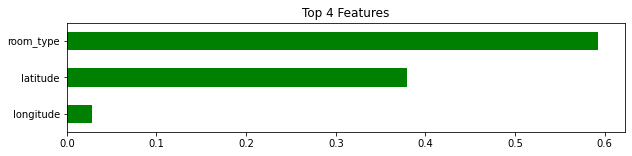

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

n = 4
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='green');

In [40]:
# XG Boost model
from xgboost import XGBRegressor

pipleline_XGB = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipleline_XGB.fit(X_train,y_train)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['room_type'],
                                mapping=[{'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Private room       1
Entire home/apt    2
Hotel room         3
Shared room        4
NaN               -2
dtype: int64}])),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_

In [41]:
# printing metrics
pred = pipleline_XGB.predict(X_val)
print("R2 Score:", r2_score(y_val,pred))
print("Mean Squared Error:", mean_squared_error(y_val,pred))
print("Mean Absolute Error:", mean_absolute_error(y_val,pred))

R2 Score: 0.034145481731855054
Mean Squared Error: 358869.73116522626
Mean Absolute Error: 165.91243427099226


In [51]:
import pickle
# Dump the trained Random Forest Regressor with Pickle
pickle_filename = 'airBnB_model.pkl'
pickled_model = open(pickle_filename, 'wb')  # Open the file to save as pkl file
pickle.dump(pipeline, pickled_model)
pickled_model.close() # Close the pickle instances
# Loading the saved model
model_pkl = open(pickle_filename, 'rb')
RF_model = pickle.load(model_pkl)
print ("Loaded model :: ", RF_model)  # print to verify

Loaded model ::  Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['room_type'],
                                mapping=[{'col': 'room_type',
                                          'data_type': dtype('O'),
                                          'mapping': Private room       1
Entire home/apt    2
Hotel room         3
Shared room        4
NaN               -2
dtype: int64}])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=3, n_estimators=50, n_jobs=-1,
                                       random_state=42))])


In [52]:
# Dummy data to test the pickled model
test = pd.DataFrame({'room_type':['Private room'],'latitude':[34],'longitude':[-84]})
test.head()

,room_type,latitude,longitude
0,Private room,34,-84


In [56]:
# import the pickled model & tested
import_pickle = 'airBnB_model.pkl'
RF_model = open(import_pickle, 'rb')
RF = pickle.load(RF_model)
print(RF.predict(test)[0])

  

110.34107741649699


In [57]:
RF.predict(pd.DataFrame({'room_type':['Private room'],'latitude':[34],'longitude':[-84]}))[0]

110.34107741649699